# Luiz Henrique dos Santos Faleiros
# GU3003825

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Criando as datas para numeros

In [39]:
months = {'jan': 1, 'feb': 2, 'mar':3, 'apr': 4, 'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
day_of_week = {'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6}

In [40]:
ff = pd.read_csv('forestfires.csv')

In [41]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [42]:
ff['month'] = ff['month'].map(months)

In [43]:
ff['day'] = ff['day'].map(day_of_week)

In [44]:
ff

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,6,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,6,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,6,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,5,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [45]:
ff.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [46]:
ff = ff[ff['area'] > 0]

<AxesSubplot:xlabel='month', ylabel='count'>

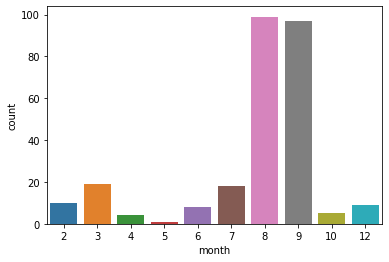

In [47]:
sns.countplot(x=ff['month'])

<AxesSubplot:xlabel='month', ylabel='temp'>

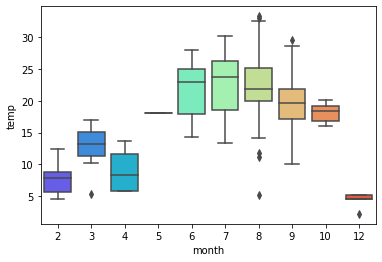

In [48]:
sns.boxplot(x='month', y='temp', data=ff,palette='rainbow')

<AxesSubplot:xlabel='month', ylabel='DMC'>

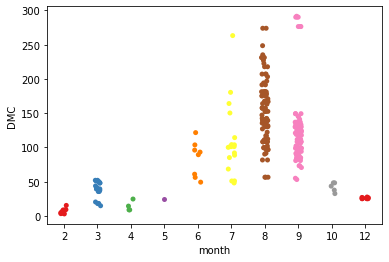

In [49]:
sns.stripplot(x='month',y='DMC',data=ff,palette='Set1')

<AxesSubplot:xlabel='month', ylabel='FFMC'>

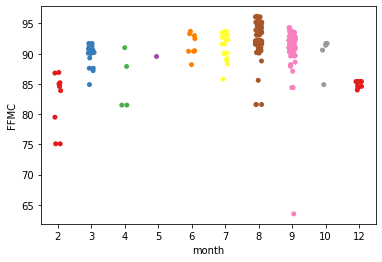

In [50]:
sns.stripplot(x='month',y='FFMC',data=ff,palette='Set1')

<AxesSubplot:>

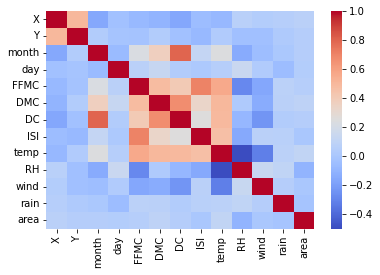

In [51]:
sns.heatmap(ff.corr(), cmap='coolwarm')

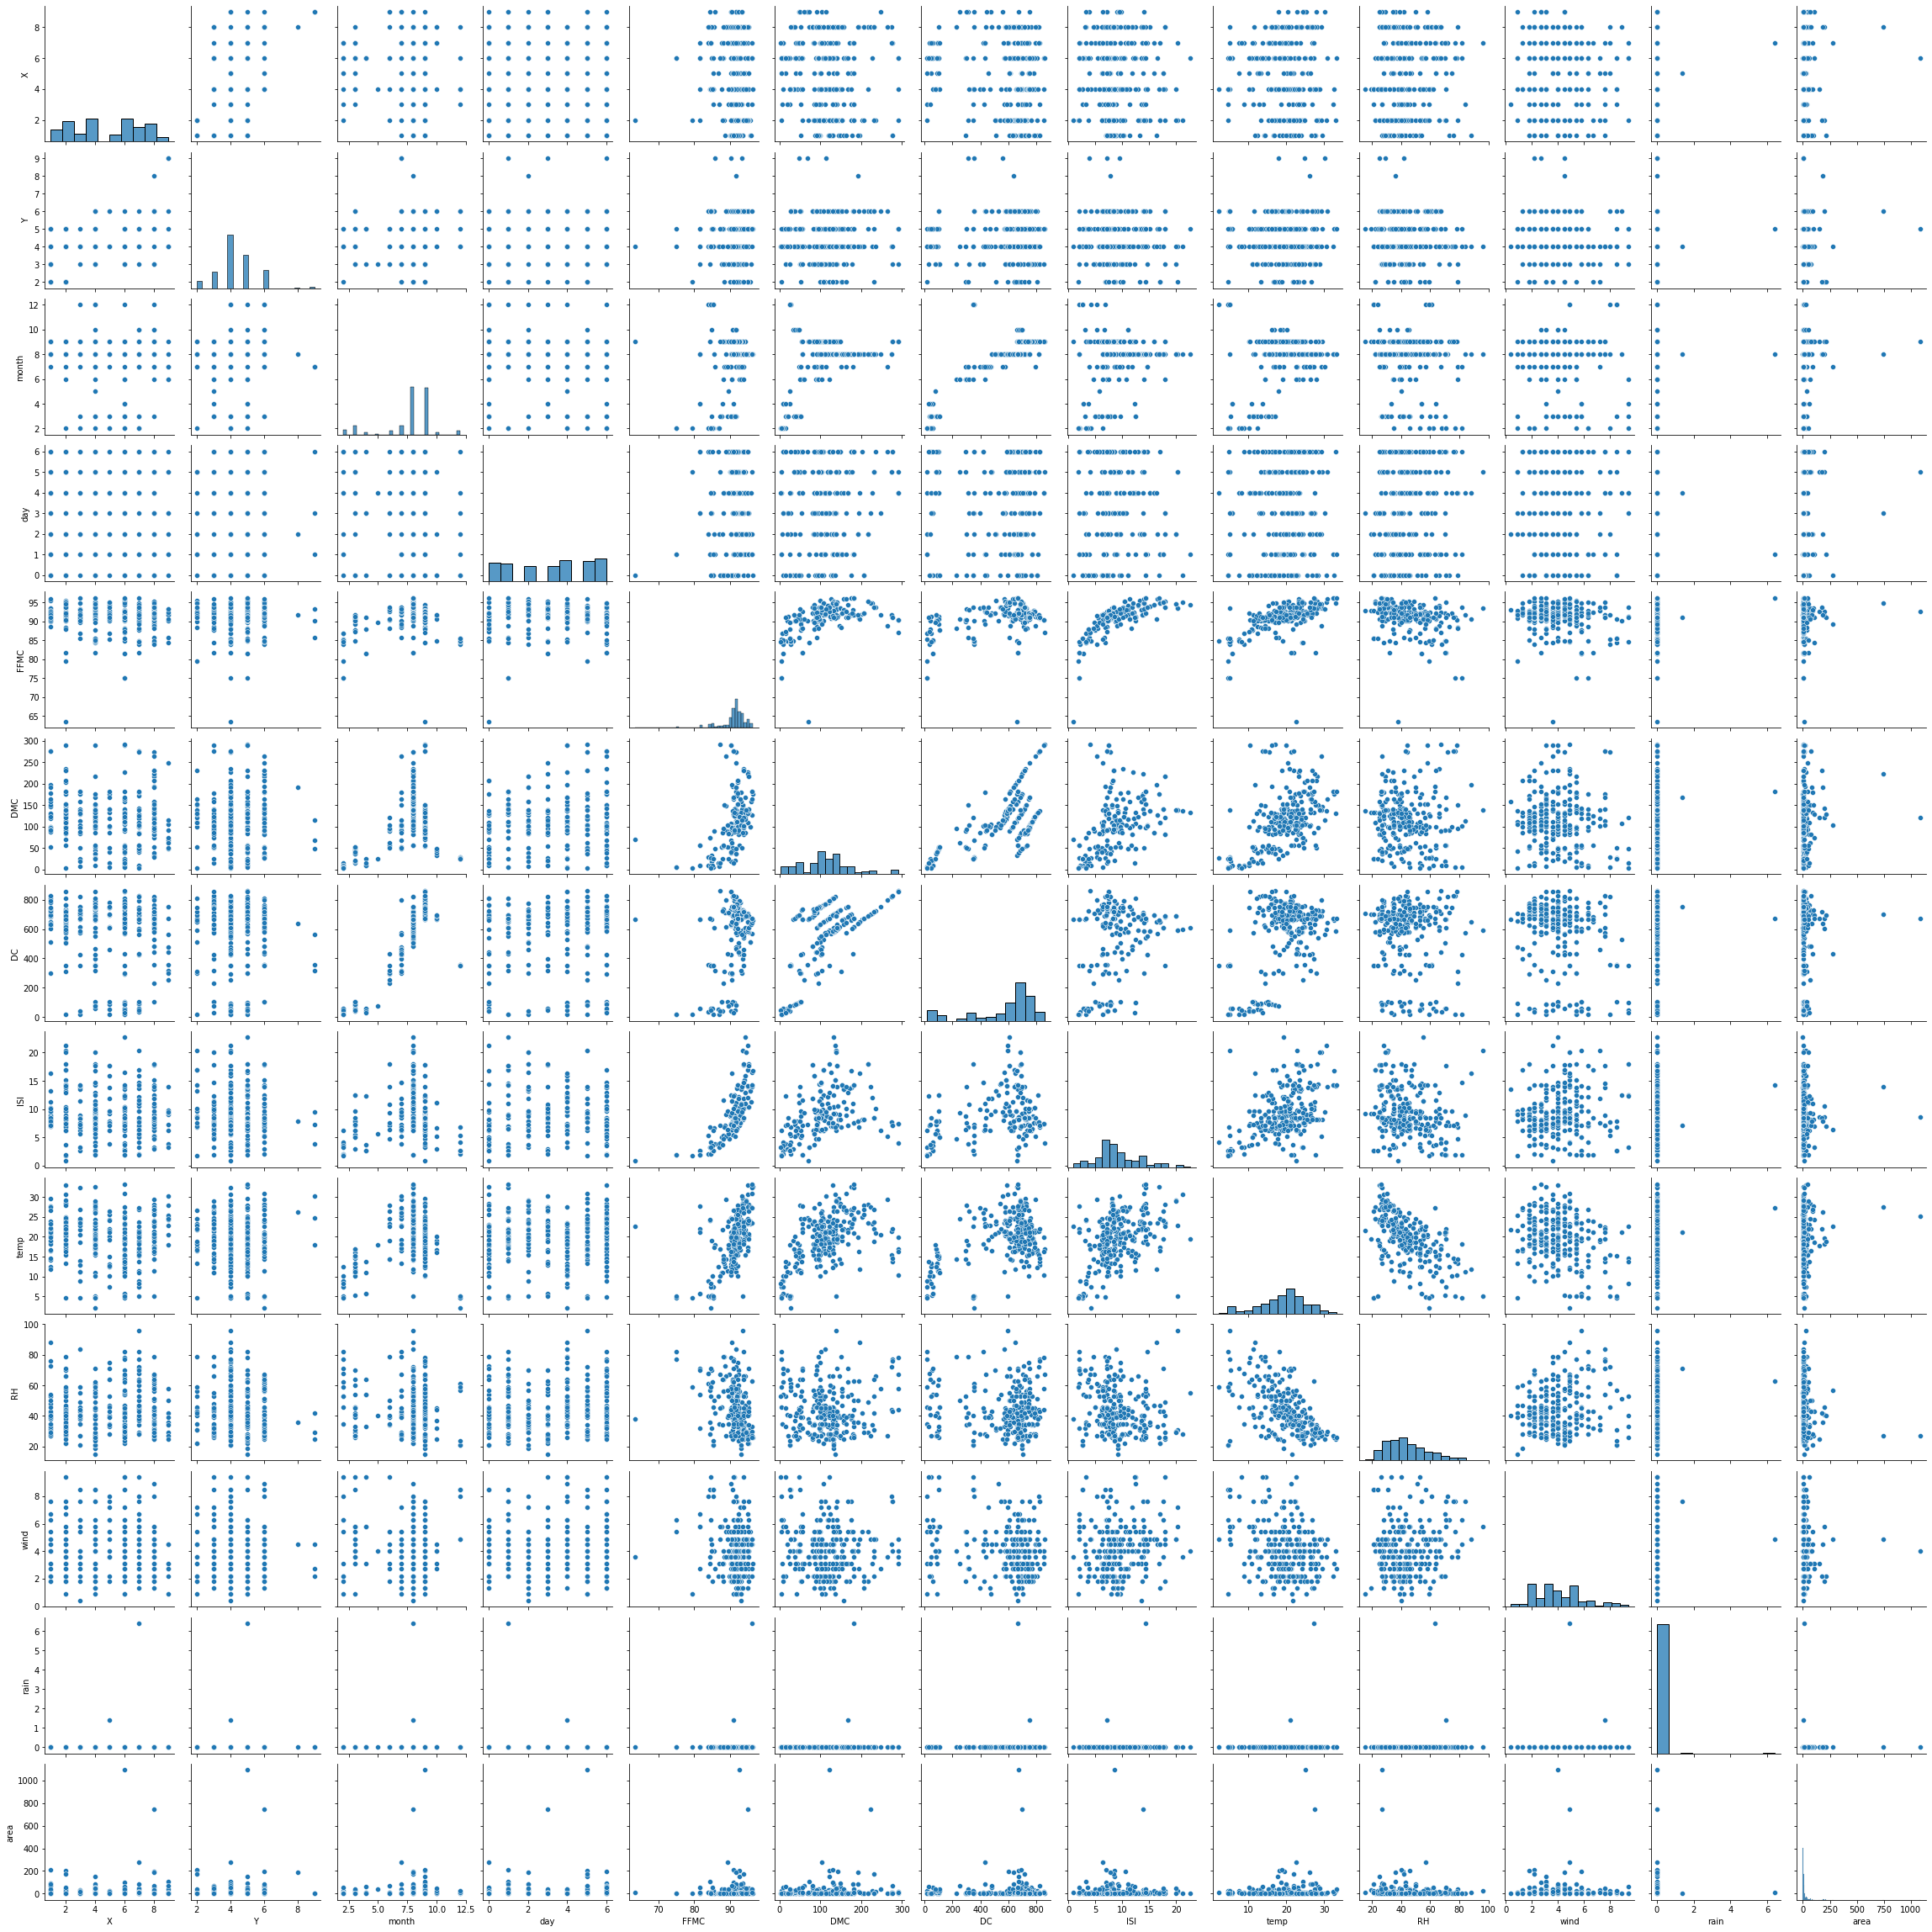

In [52]:
sns.pairplot(ff)

In [53]:
ff.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [54]:
x = ff[['area', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'day']]
y = ff['month']

In [55]:
x_train, x_teste, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=110)

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
print(lm.intercept_)

6.119641952414347


In [59]:
print(lm.coef_)

[ 0.00049215 -0.00438085 -0.00650963  0.01016402  0.00036487 -0.1118535
 -0.0327997   0.17971147  0.11049463 -0.03465999]


In [60]:
coeficiente = pd.DataFrame(lm.coef_,x.columns, columns=['Coeficiente'])

In [61]:
coeficiente

,Coeficiente
area,0.000492
FFMC,-0.004381
DMC,-0.006510
DC,0.010164
ISI,0.000365
temp,-0.111853
RH,-0.032800
wind,0.179711
rain,0.110495
day,-0.034660


In [62]:
predict = lm.predict(x_teste)

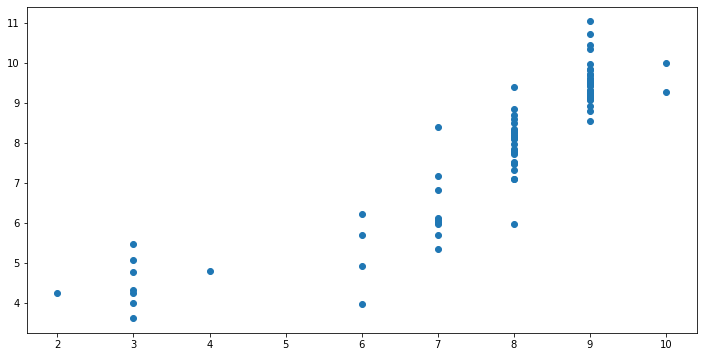

In [63]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict)

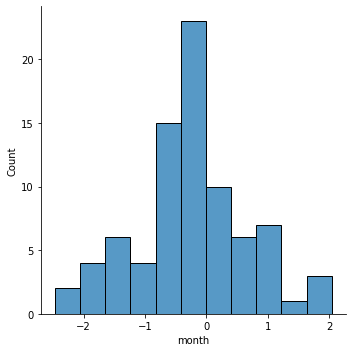

In [64]:
sns.displot(((y_test-predict)))

In [65]:
print('MAE', metrics.mean_absolute_error(y_test,predict))

MAE 0.7003105898982835


In [66]:
print('MSE', metrics.mean_squared_error(y_test,predict))

MSE 0.8456875450464884


In [67]:
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predict)))

RMSE 0.9196127147046675
